# Advanced Lane Finding Project

In [1]:
# Imports
import os
import pickle
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from utils import pns_image, add_polygon
import cameraCalibration as cc
import lineDetection as ld
from laneSegmentation import Lane

%matplotlib inline

In [2]:
files = glob.glob('camera_cal/calibration*.jpg')
ret, mtx, dist, rvecs, tvecs = cc.calibrate_camera(files)

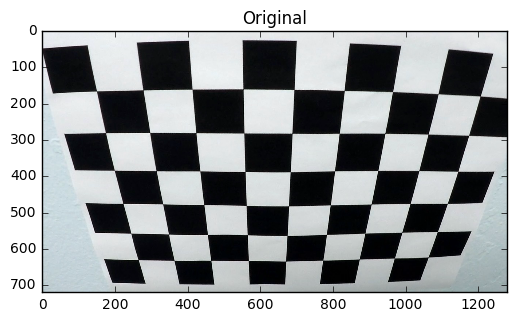

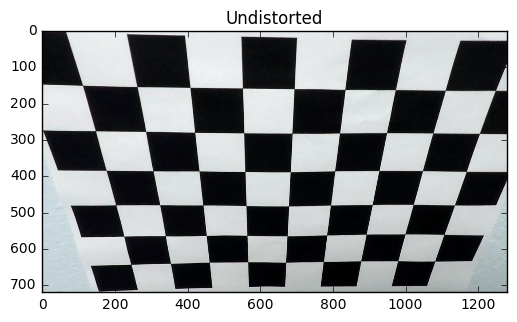

In [3]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration2.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
pns_image(img, 'Original', filename='output_images/original_image')
pns_image(dst, 'Undistorted', filename='output_images/undistorted_image')

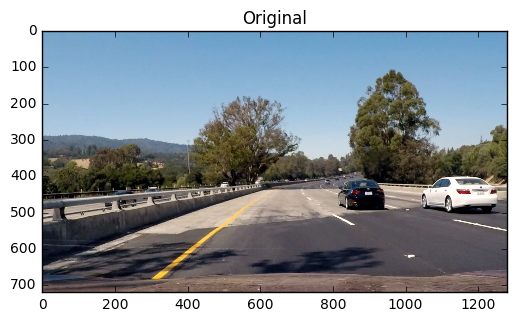

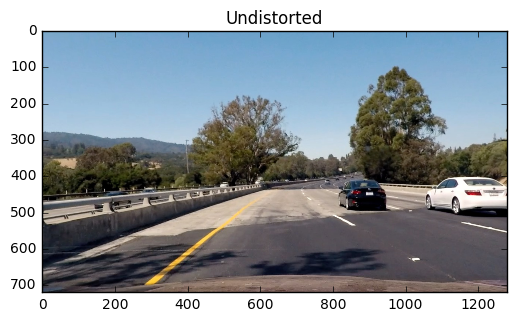

In [4]:
image = mpimg.imread('test_images/test4.jpg')
pns_image(image, 'Original', filename='output_images/original_road_image')
undist = cv2.undistort(image, mtx, dist, None, mtx)
pns_image(undist, 'Undistorted', filename='output_images/undistorted_road_image')

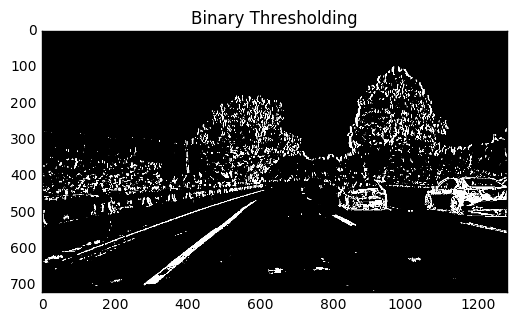

In [5]:
imgline = ld.detect_line(undist)
pns_image(imgline, 'Binary Thresholding', filename='output_images/thresholded_binary', gray=True)

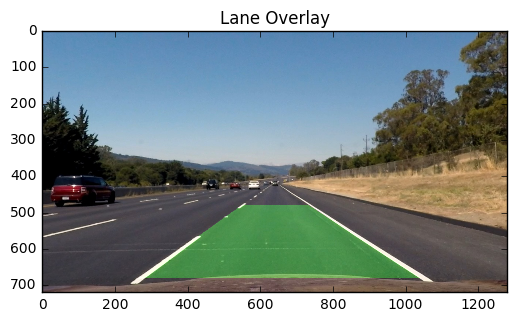

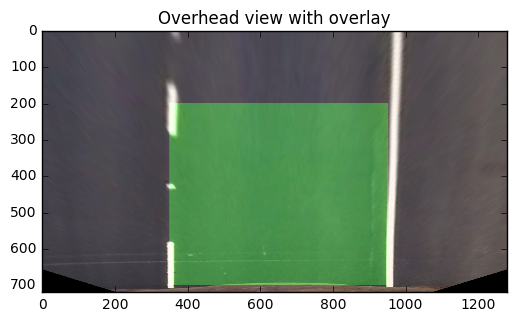

In [6]:
image = mpimg.imread('test_images/straight_lines2.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)
warped = cc.warp_image(undist)

src = np.float32([  [270, 680],
                    [1040, 680],
                    [730, 480],
                    [550, 480]])
dst = np.float32(  [[350, 700],
                    [950, 700],
                    [950, 200],
                    [350, 200]])

pns_image(add_polygon(undist, src), 'Lane Overlay',
         filename='output_images/straight_lines')

pns_image(add_polygon(warped, dst), 'Overhead view with overlay',
         filename='output_images/warped_straight_lines')

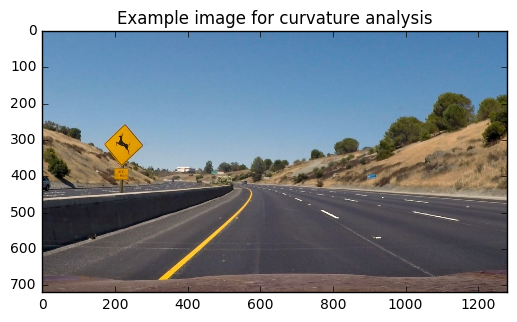

In [7]:
image = mpimg.imread('test_images/test2.jpg')
pns_image(image, title='Example image for curvature analysis')


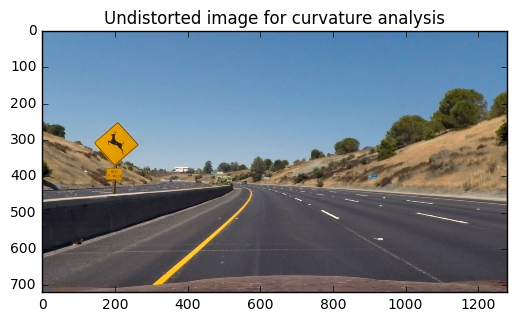

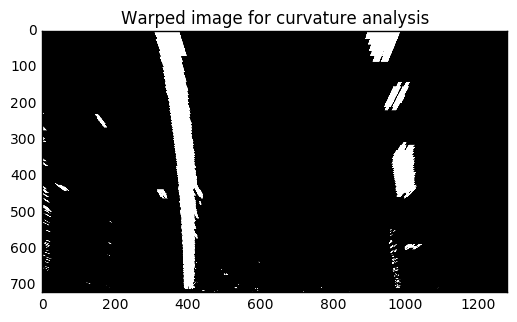

In [8]:
# Init the Lane object using the perspective transform matrix
lane = Lane(mtx, dist)
undist, warped = lane.process_image(image)
pns_image(undist, title='Undistorted image for curvature analysis')
pns_image(warped, title='Warped image for curvature analysis', gray=True)

result = lane.update_lane(image)

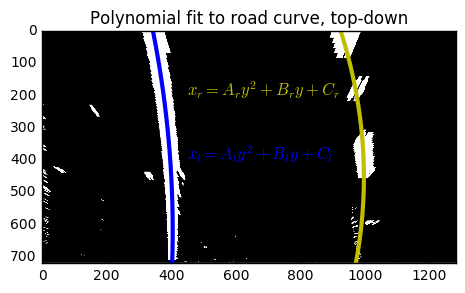

In [9]:
plt.figure(figsize=(12,3))
plt.imshow(warped, cmap='Greys_r')
plt.plot(lane.ll.polynomial(lane.ll.best_fit), lane.ll.yvals, '-b',  linewidth=3)
plt.plot(lane.rl.polynomial(lane.rl.best_fit), lane.rl.yvals, '-y',  linewidth=3)

ax = plt.gca()
ax.annotate(r'$x_l = A_l y^2 + B_l y + C_l$', xy=(380, 600), xytext=(450, 400),color='b', size=12)
ax.annotate(r'$x_r = A_r y^2 + B_r y + C_r$', xy=(1000, 350), xytext=(450, 200),color='y',size=12)
ax.set_xlim([0, warped.shape[1]])
ax.set_ylim([0, warped.shape[0]])
ax.invert_yaxis()
ax.set_title('Polynomial fit to road curve, top-down')
plt.savefig('output_images/poly_fit.jpg')

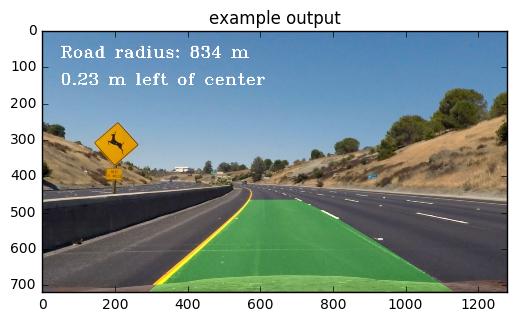

In [10]:
pns_image(result, 'example output',
         filename='output_images/example_output')

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
clip1 = VideoFileClip('project_video.mp4')
output_clip = clip1.fl_image(lane.update_lane) #NOTE: this function expects color images!!
%time output_clip.write_videofile('result_video.mp4', audio=False)

[MoviePy] >>>> Building video result_video.mp4
[MoviePy] Writing video result_video.mp4


100%|█████████▉| 1260/1261 [04:56<00:00,  3.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: result_video.mp4 

CPU times: user 11min 16s, sys: 11.7 s, total: 11min 28s
Wall time: 4min 59s


In [13]:
clip2 = VideoFileClip('harder_challenge_video.mp4')
output_clip = clip2.fl_image(lane.update_lane) #NOTE: this function expects color images!!
%time output_clip.write_videofile('challenge_result_video.mp4', audio=False)

[MoviePy] >>>> Building video challenge_result_video.mp4
[MoviePy] Writing video challenge_result_video.mp4



 17%|█▋        | 200/1200 [00:47<04:30,  3.70it/s]

TypeError: expected non-empty vector for x

In [ ]:
# Fin